In [489]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### Removendo os valores da coluna "Situação Cadastral" que não sejam "Encerrado" ou "Ativa"

In [490]:
tdf_relatorio=pd.read_csv("relatorio.csv",sep=';')

df_relatorio = tdf_relatorio[(tdf_relatorio['Situação Cadastral'] == "Encerrado") | (tdf_relatorio['Situação Cadastral'] == "Ativa")]

df_relatorio['Quantidade'] = pd.to_numeric(df_relatorio['Quantidade'], errors='coerce') # Transformar a coluna quantidade em número 

display(df_relatorio.head(5))

C:\Users\henriquelucareli-ieg\AppData\Local\Temp\ipykernel_28340\2194854420.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CNPJ,Razão Social,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,Empresa Destinadora do Resíduo,Situação Cadastral
0,00.024.376/0001-36,IDEAL COMERCIO DE TAMBORES LTDA,SAO PAULO,GUARULHOS,2004,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,1.000,kilogramas,40.263.170/0008-50 - SOLVÍ ESSENCIS AMBIENTAL ...,Ativa
1,00.024.376/0001-36,IDEAL COMERCIO DE TAMBORES LTDA,SAO PAULO,GUARULHOS,2010,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,72.000,Ton. por ano,50.856.251/0001-40 - SILCON AMBIENTAL S/A,Ativa
2,00.024.376/0001-36,IDEAL COMERCIO DE TAMBORES LTDA,SAO PAULO,GUARULHOS,2012,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,111.000,Ton. por ano,50.856.251/0001-40 - SILCON AMBIENTAL S/A,Ativa
3,00.060.922/0001-94,COMÉRCIO DE SUCATAS MALLON LTDA - ME,SANTA CATARINA,SAO BENTO DO SUL,2009,Embalagens metálicas (latas vazias não contami...,Outros,26.876,Unidade,07.358.761/0033-46 - GERDAU AÇOS LONGOS S.A.,Ativa
4,00.060.922/0001-94,COMÉRCIO DE SUCATAS MALLON LTDA - ME,SANTA CATARINA,SAO BENTO DO SUL,2009,Embalagens metálicas (latas vazias não contami...,Outros,2.257,Unidade,72.043.862/0001-02 - RANDALL INDUSTRIA E COMÉR...,Ativa


### Estado

In [491]:
contagem_situacao = df_relatorio['Estado'].value_counts()

valores_maior_que_100 = contagem_situacao[contagem_situacao > 122].index

df_relatorio = df_relatorio[df_relatorio['Estado'].isin(valores_maior_que_100)]

['SAO PAULO' 'SANTA CATARINA' 'PARANA' 'GOIAS' 'RIO DE JANEIRO'
 'MINAS GERAIS' 'ESPIRITO SANTO' 'BAHIA' 'AMAZONAS' 'RIO GRANDE DO SUL'
 'CEARA' 'PERNAMBUCO']


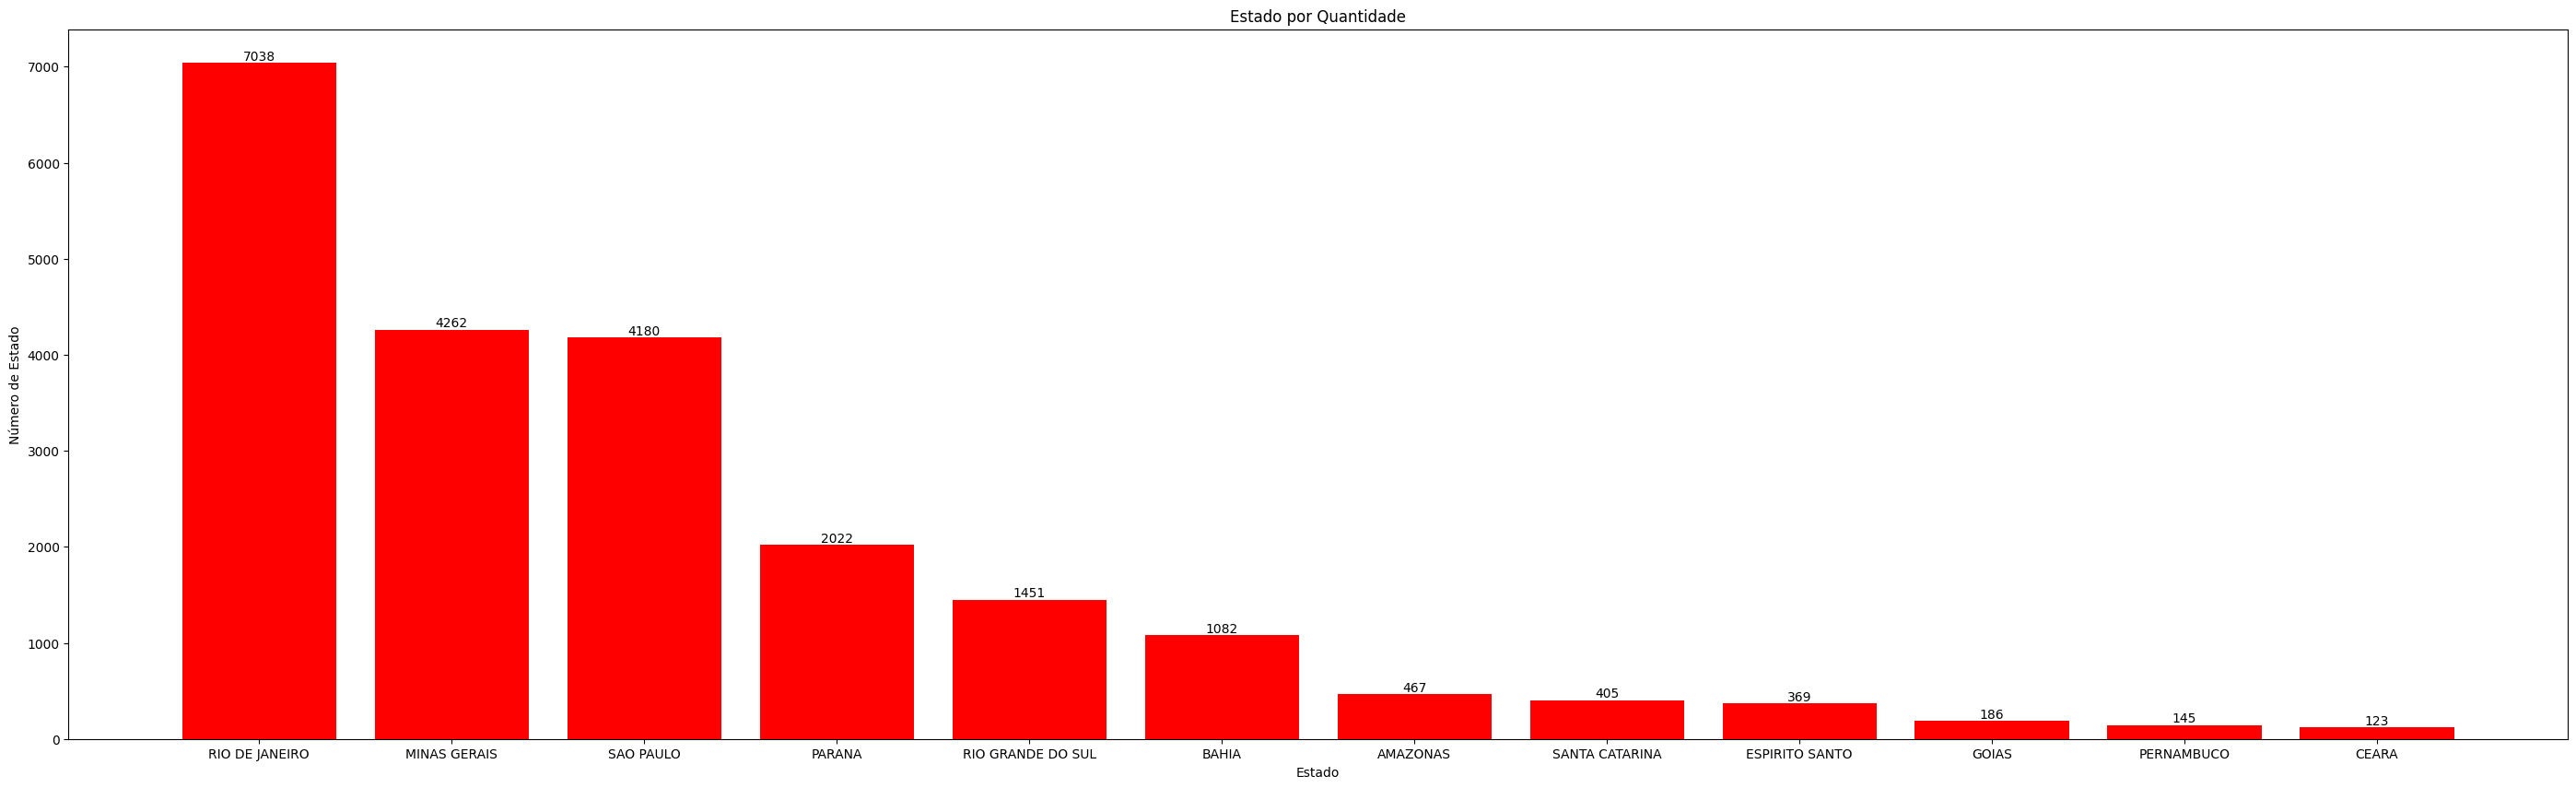

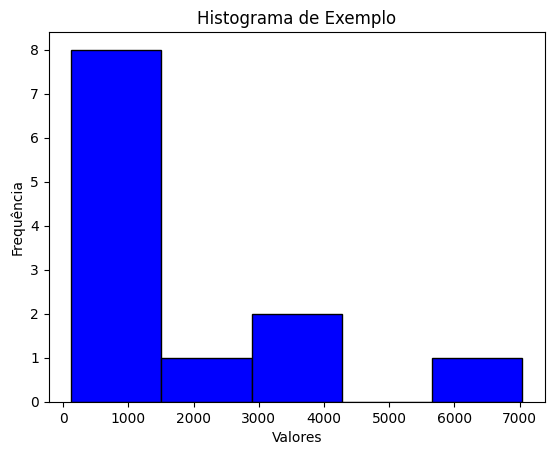

In [492]:
# Exibindo os valores únicos na coluna 'Estado'
print(df_relatorio['Estado'].unique())

# Contando as ocorrências de cada valor em 'Estado'
contagem_situacao = df_relatorio['Estado'].value_counts()

# Ajustando o tamanho do gráfico
plt.figure(figsize=(35, 10))  # Altere os valores para ajustar o tamanho (largura, altura)

# Criando o gráfico de barras
plt.bar(contagem_situacao.index, contagem_situacao.values, color="red")

# Adicionando os valores acima das barras
for i, valor in enumerate(contagem_situacao.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Configurando os rótulos dos eixos e o título
plt.ylabel('Número de Estado')
plt.xlabel('Estado')
plt.title('Estado por Quantidade')

# Exibindo o gráfico
plt.show()

# Criando o histograma
plt.hist(contagem_situacao, bins=5, color='blue', edgecolor='black')

# Adicionando título e rótulos
plt.title('Histograma de Exemplo')
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

# Criando o box plot
fig = px.box(contagem_situacao, y=contagem_situacao, labels={'y': 'Valores'}, title='Box Plot de Exemplo')

# Exibindo o gráfico
fig.show()

### Método de Reciclagem

In [493]:
contagem_situacao = df_relatorio['Método de Reciclagem'].value_counts()

valores_maior_que_100 = contagem_situacao[contagem_situacao > 38].index

df_relatorio = df_relatorio[df_relatorio['Método de Reciclagem'].isin(valores_maior_que_100)]


['Queima em formos industriais' 'Outros' 'Queima caldeira' 'Compostagem'
 'Neutralização' 'Biológico' 'Adsorção' 'Secagem']


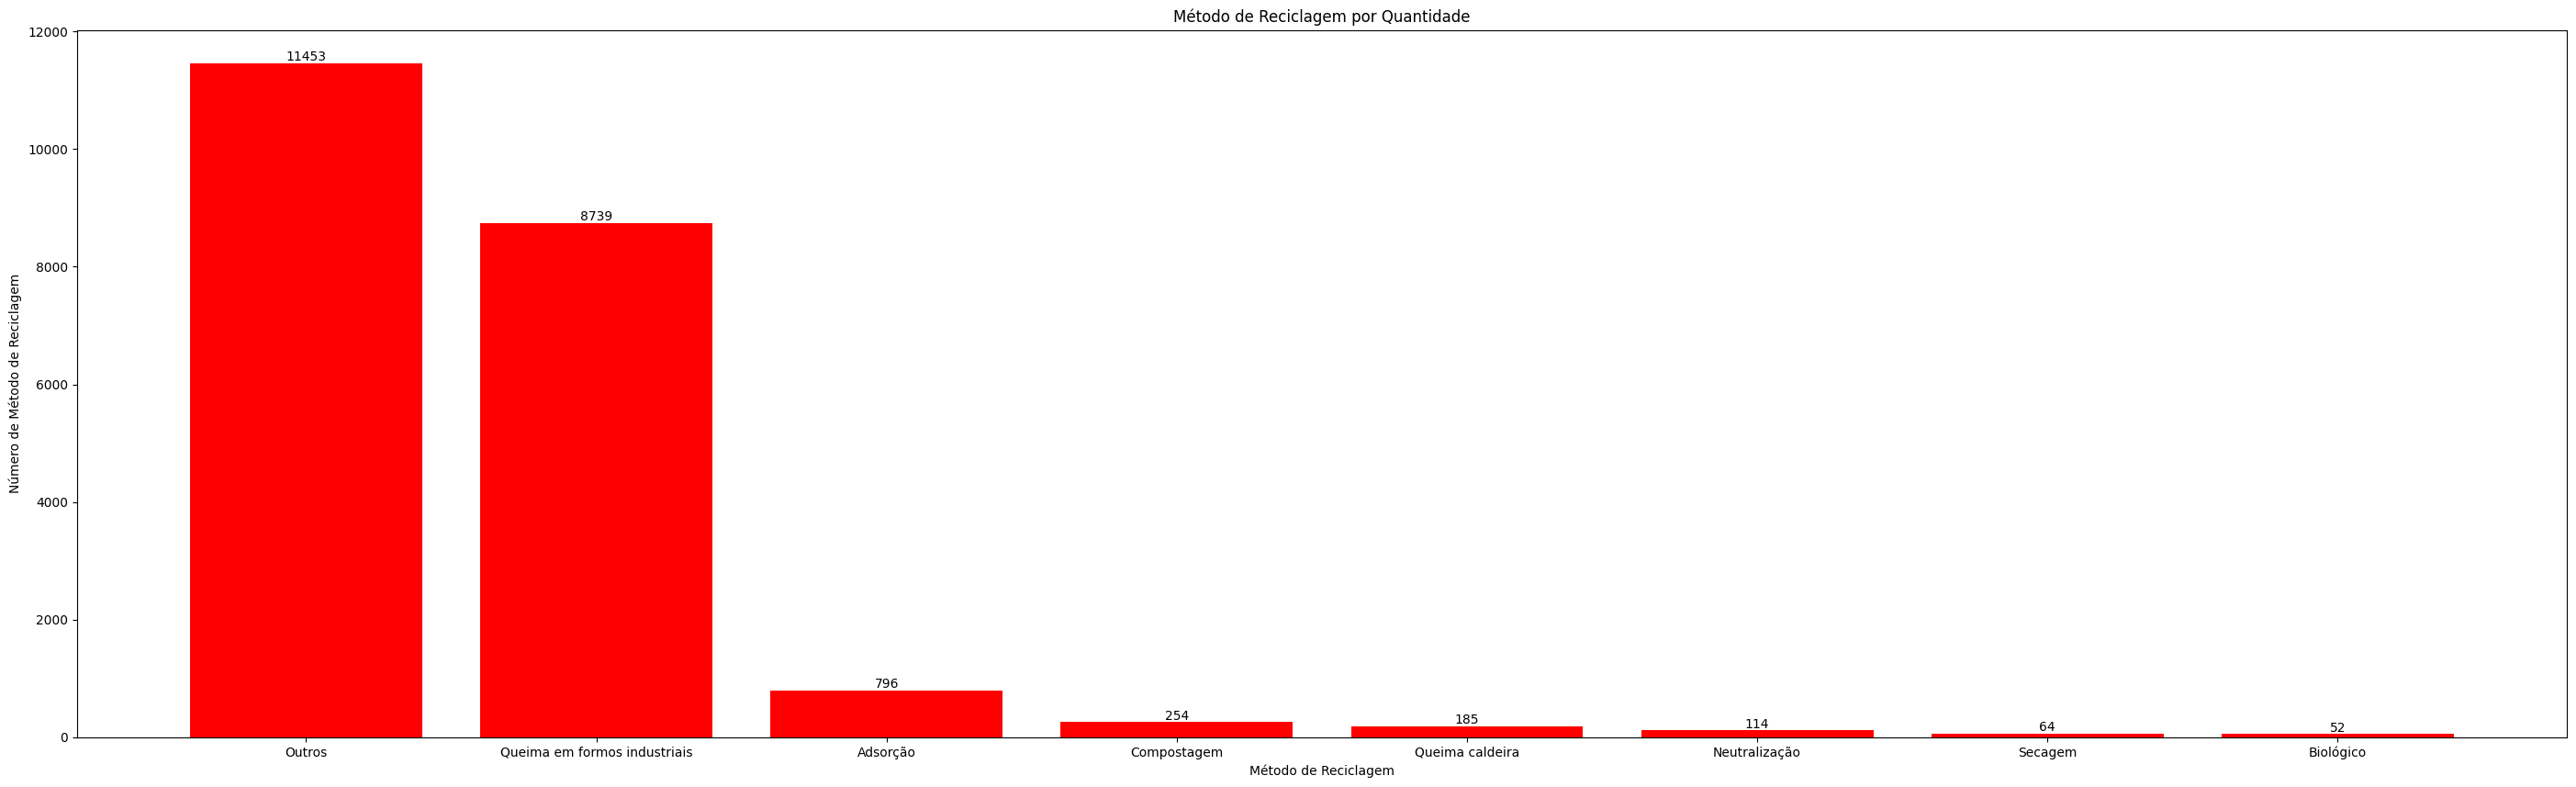

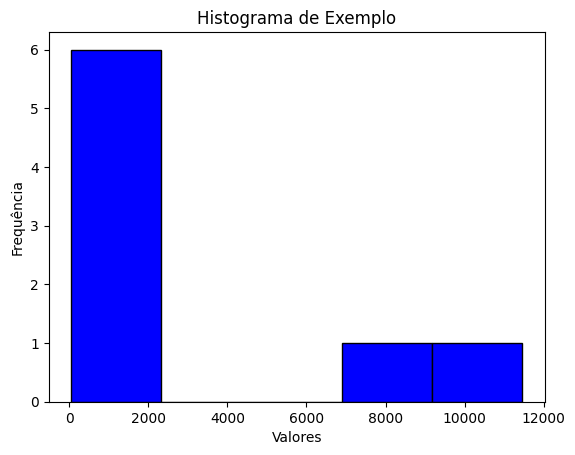

In [494]:
import matplotlib.pyplot as plt

# Exibindo os valores únicos na coluna 'Município'
print(df_relatorio['Método de Reciclagem'].unique())

# Contando as ocorrências de cada valor em 'Método de Reciclagem'
contagem_situacao = df_relatorio['Método de Reciclagem'].value_counts()

# Ajustando o tamanho do gráfico
plt.figure(figsize=(35, 10))  # Altere os valores para ajustar o tamanho (largura, altura)

# Criando o gráfico de barras
plt.bar(contagem_situacao.index, contagem_situacao.values, color="red")

# Adicionando os valores acima das barras
for i, valor in enumerate(contagem_situacao.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Configurando os rótulos dos eixos e o título
plt.ylabel('Número de Método de Reciclagem')
plt.xlabel('Método de Reciclagem')
plt.title('Método de Reciclagem por Quantidade')

# Exibindo o gráfico
plt.show()

# Criando o histograma
plt.hist(contagem_situacao, bins=5, color='blue', edgecolor='black')

# Adicionando título e rótulos
plt.title('Histograma de Exemplo')
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

# Criando o box plot
fig = px.box(contagem_situacao, y=contagem_situacao, labels={'y': 'Valores'}, title='Box Plot de Exemplo')

# Exibindo o gráfico
fig.show()

### Quantidade

['SAO PAULO' 'SANTA CATARINA' 'PARANA' 'GOIAS' 'RIO DE JANEIRO'
 'MINAS GERAIS' 'ESPIRITO SANTO' 'BAHIA' 'AMAZONAS' 'RIO GRANDE DO SUL'
 'CEARA' 'PERNAMBUCO']


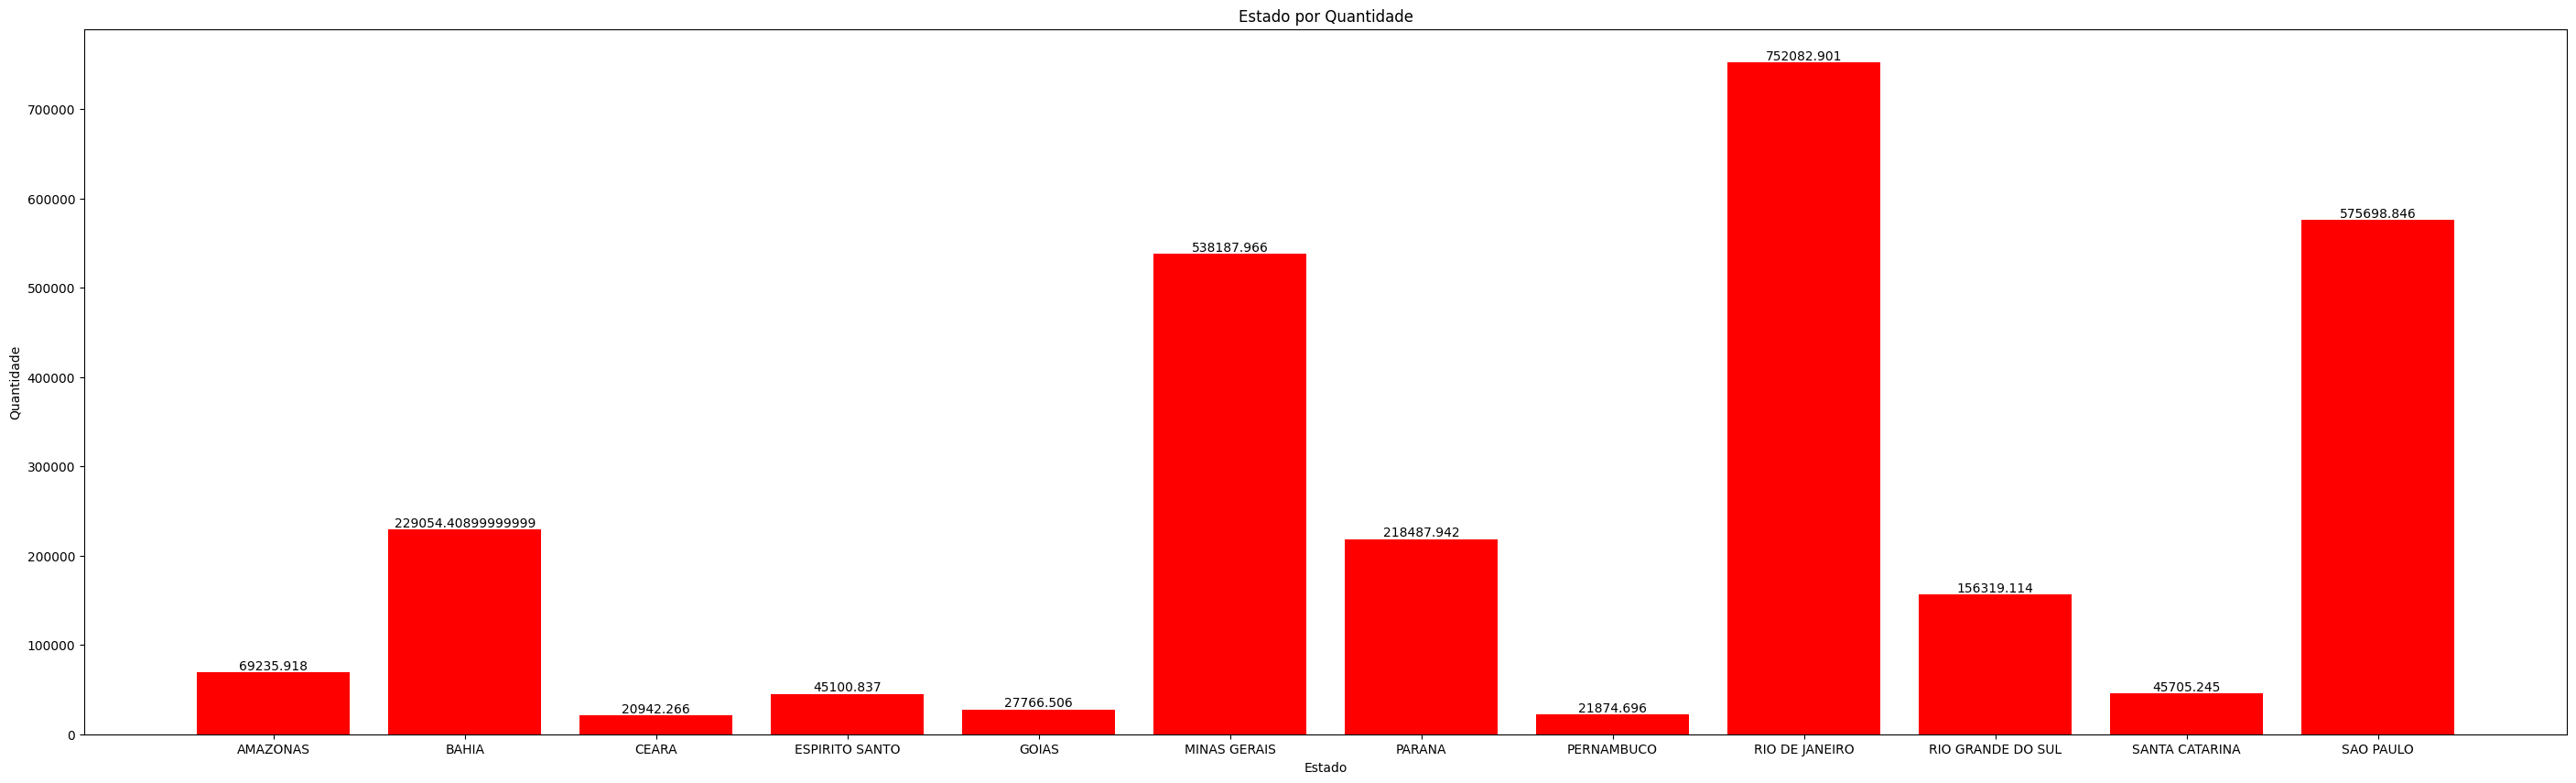

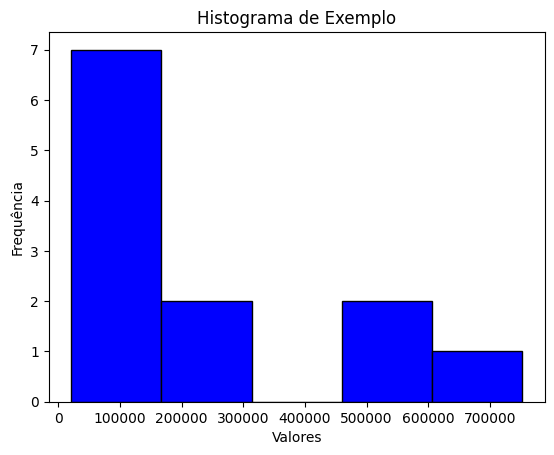

In [495]:
import matplotlib.pyplot as plt

# Exibindo os valores únicos na coluna 'Método de Reciclagem'
print(df_relatorio['Estado'].unique())

# Agrupando por 'Estado' e somando as quantidades
contagem_situacao = df_relatorio.groupby('Estado')['Quantidade'].sum()

# Ajustando o tamanho do gráfico
plt.figure(figsize=(35, 10))  # Altere os valores para ajustar o tamanho (largura, altura)

# Criando o gráfico de barras
plt.bar(contagem_situacao.index, contagem_situacao.values, color="red")

# Adicionando os valores acima das barras
for i, valor in enumerate(contagem_situacao.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Configurando os rótulos dos eixos e o título
plt.ylabel('Quantidade')
plt.xlabel('Estado')
plt.title('Estado por Quantidade')

# Exibindo o gráfico
plt.show()

# Criando o histograma
plt.hist(contagem_situacao, bins=5, color='blue', edgecolor='black')

# Adicionando título e rótulos
plt.title('Histograma de Exemplo')
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

# Criando o box plot
fig = px.box(contagem_situacao, y=contagem_situacao, labels={'y': 'Valores'}, title='Box Plot de Exemplo')

# Exibindo o gráfico
fig.show()

### Unidade de medida

['kilogramas' 'Ton. por ano' 'Unidade' 'Litro' 'Tonelada' 'Folha'
 'Milheiro' 'Peça' 'Metro Cúbico' 'Orquidário' 'Unidade Reestruturada'
 'Dia' 'Caixa' 'Kg por covo dia de mar' 'Tonelada por metro cúbico'
 'Grama por Kilograma' 'Galão' 'Kg por barco ano' 'Quilometro' 'Livro'
 'Frasco' 'Rolo' 'Metro' 'Kilograma por 100 Kilos' 'Anuário' 'Grama'
 'Espécie' 'Km² por ano' 'Amostra' 'Embarcação' 'Kilograma/ha' 'Litro/ha'
 'Tora' 'Lata' 'Estéreo' 'Gigawatthora' 'Estéreo/ha' 'Grama por Litro'
 'Estirpe' 'Exemplar' 'Hectare' 'Grama por Metro Cúbico' 'Tubo'
 'Metro Cúbico/ha']


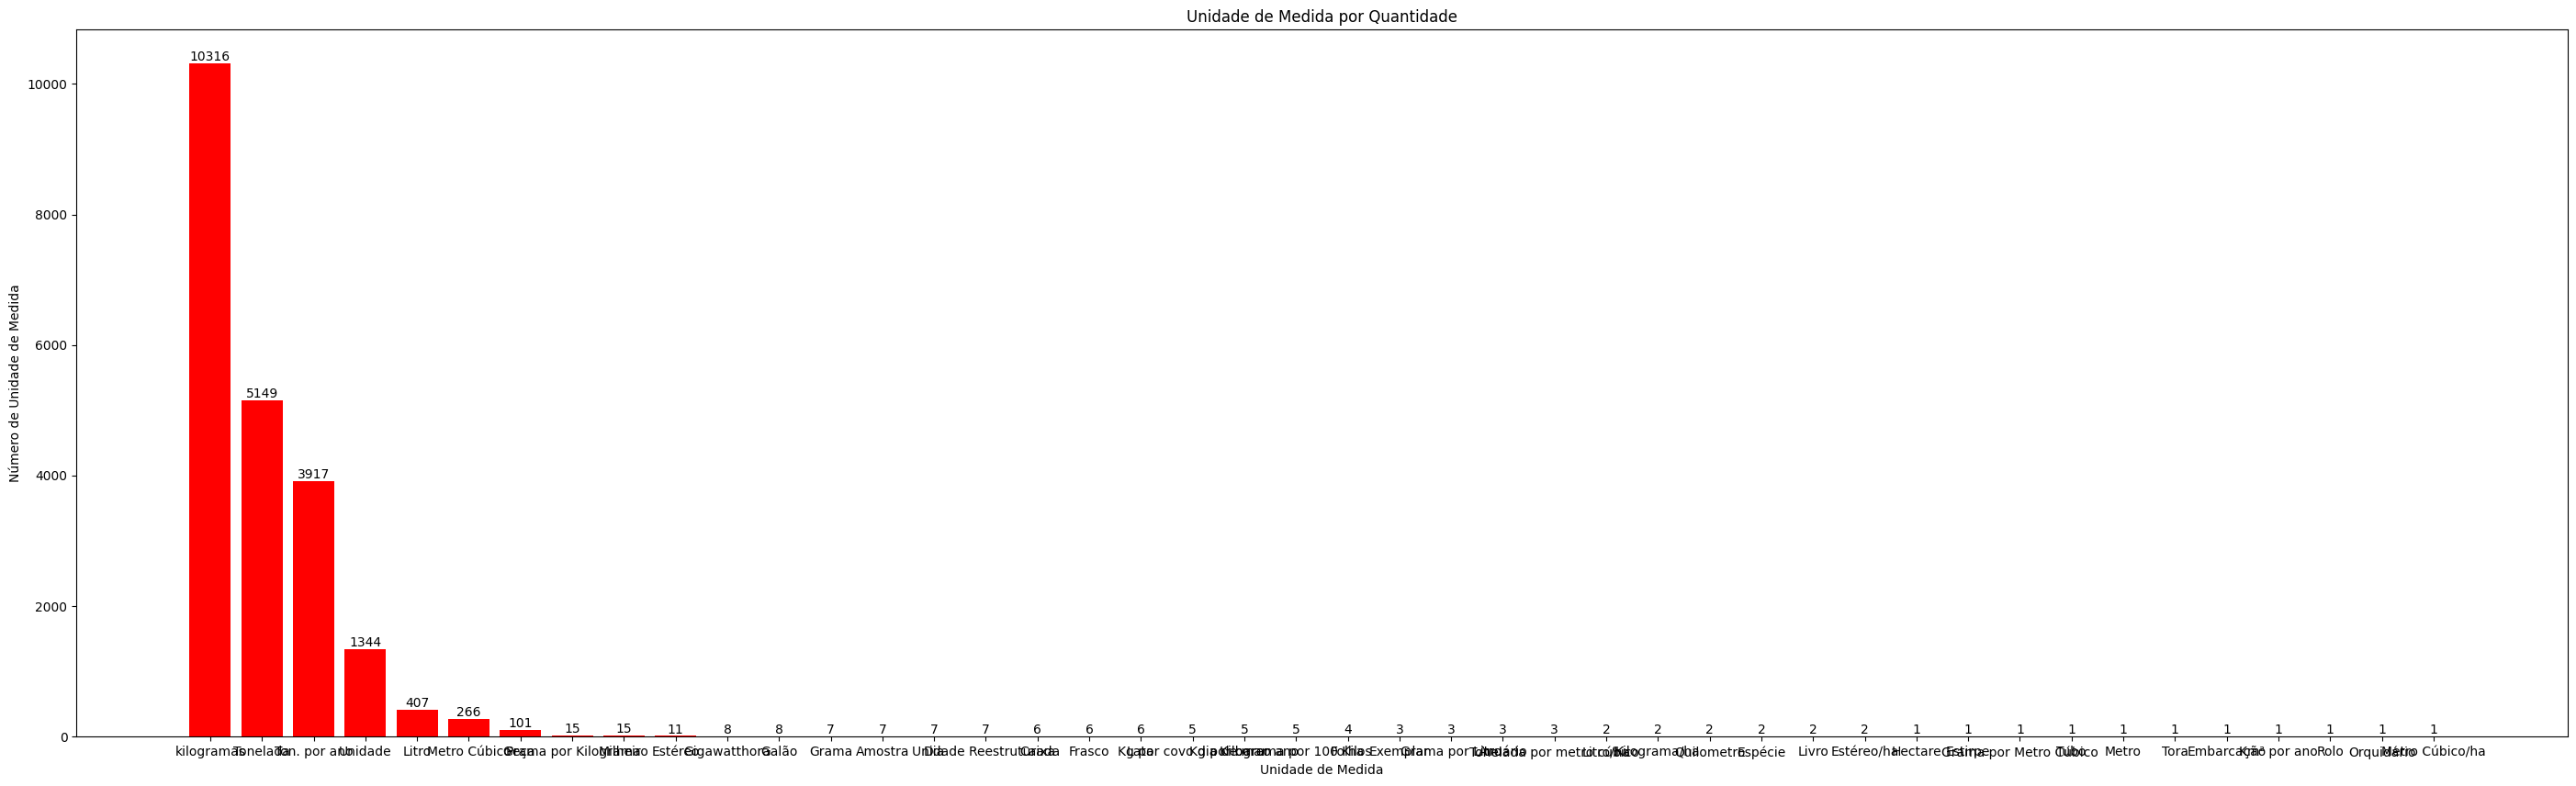

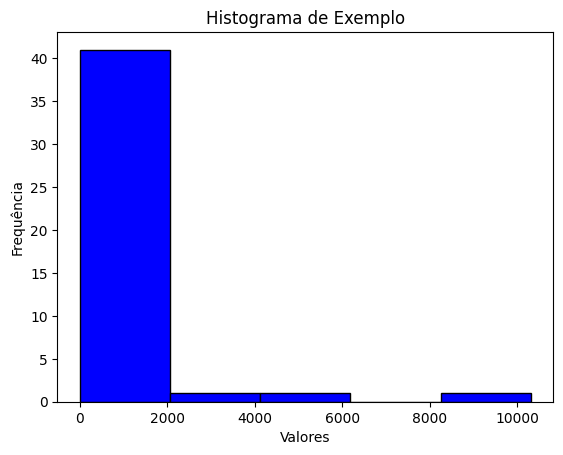

In [496]:
import matplotlib.pyplot as plt

# Exibindo os valores únicos na coluna 'Município'
print(df_relatorio['Unidade de Medida'].unique())

# Contando as ocorrências de cada valor em 'Unidade de Medida'
contagem_situacao = df_relatorio['Unidade de Medida'].value_counts()

# Ajustando o tamanho do gráfico
plt.figure(figsize=(35, 10))  # Altere os valores para ajustar o tamanho (largura, altura)

# Criando o gráfico de barras
plt.bar(contagem_situacao.index, contagem_situacao.values, color="red")

# Adicionando os valores acima das barras
for i, valor in enumerate(contagem_situacao.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Configurando os rótulos dos eixos e o título
plt.ylabel('Número de Unidade de Medida')
plt.xlabel('Unidade de Medida')
plt.title('Unidade de Medida por Quantidade')

# Exibindo o gráfico
plt.show()

# Criando o histograma
plt.hist(contagem_situacao, bins=5, color='blue', edgecolor='black')

# Adicionando título e rótulos
plt.title('Histograma de Exemplo')
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

# Criando o box plot
fig = px.box(contagem_situacao, y=contagem_situacao, labels={'y': 'Valores'}, title='Box Plot de Exemplo')

# Exibindo o gráfico
fig.show()

### Situação Cadastral

['Ativa' 'Encerrado']


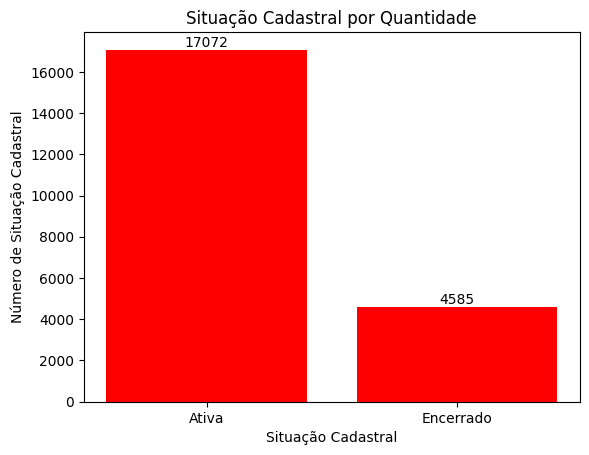

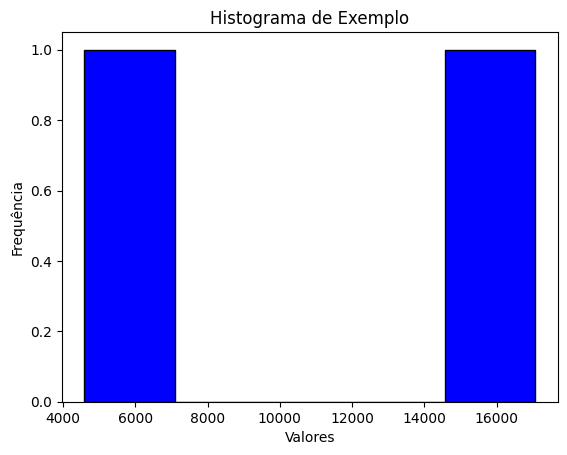

In [497]:
print(df_relatorio['Situação Cadastral'].unique())

# Contando as ocorrências de cada valor em 'Situação Cadastral'
contagem_situacao = df_relatorio['Situação Cadastral'].value_counts()

# Criando o gráfico de barras
plt.bar(contagem_situacao.index, contagem_situacao.values, color="red")

# Adicionando os valores acima das barras
for i, valor in enumerate(contagem_situacao.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Configurando os rótulos dos eixos e o título
plt.ylabel('Número de Situação Cadastral')
plt.xlabel('Situação Cadastral')
plt.title('Situação Cadastral por Quantidade')
plt.show()

# Criando o histograma
plt.hist(contagem_situacao, bins=5, color='blue', edgecolor='black')

# Adicionando título e rótulos
plt.title('Histograma de Exemplo')
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

# Criando o box plot
fig = px.box(contagem_situacao, y=contagem_situacao, labels={'y': 'Valores'}, title='Box Plot de Exemplo')

# Exibindo o gráfico
fig.show()

### Deletando a coluna CNPJ que não sera utilizada.

In [498]:
df_relatorio=df_relatorio.drop(columns='CNPJ')

### Removemos os valores de Unidade de Medida que não eram Kilogramas, porque existiam muitas formas de medidas diferentes indo de "Kilograma" até "Exemplar"

In [499]:
df_relatorio=(df_relatorio[df_relatorio['Unidade de Medida']=='kilogramas'])

### Usando o Z-Score para deixar as quantidades proximas, pois ela são de unidades diferentes.

In [500]:
media=df_relatorio['Quantidade'].mean()
print("Média das quantidade: ",media)

desvio_padrao=df_relatorio['Quantidade'].std()
print("Desvio padrão de quantidade: ",desvio_padrao)

Média das quantidade:  140.51813020939218
Desvio padrão de quantidade:  219.6908839693082


### Removendo as unidades de medida que não forem kilogramas, porque existem varias unidades de medida diferentes

In [501]:
df_relatorio['Quantidade']=(df_relatorio['Quantidade']-media)/desvio_padrao
df_relatorio=df_relatorio[df_relatorio['Unidade de Medida']=='kilogramas']
display(df_relatorio[df_relatorio['Unidade de Medida']=='kilogramas'])

,Razão Social,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,Empresa Destinadora do Resíduo,Situação Cadastral
0,IDEAL COMERCIO DE TAMBORES LTDA,SAO PAULO,GUARULHOS,2004,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,-0.635066,kilogramas,40.263.170/0008-50 - SOLVÍ ESSENCIS AMBIENTAL ...,Ativa
5,COMÉRCIO DE SUCATAS MALLON LTDA - ME,SANTA CATARINA,SAO BENTO DO SUL,2009,Resíduo de papel e papelão,Outros,-0.597463,kilogramas,97.469.506/0001-86 - COMERCIO E TRANSPORTES FE...,Ativa
7,COMÉRCIO DE SUCATAS MALLON LTDA - ME,SANTA CATARINA,SAO BENTO DO SUL,2009,Sucata de metais ferrosos,Outros,-0.575669,kilogramas,07.358.761/0033-46 - GERDAU AÇOS LONGOS S.A.,Ativa
9,GSM - CENTRO DE RECICLAGEM E GESTAO AMBIENTAL ...,PARANA,SAO JOSE DOS PINHAIS,2000,"Sucata de metais não ferrosos (latão, etc.)",Outros,-0.609894,kilogramas,01.300.758/0001-08 - BOING COMÉRCIO DE METAIS ...,Ativa
10,GSM - CENTRO DE RECICLAGEM E GESTAO AMBIENTAL ...,PARANA,SAO JOSE DOS PINHAIS,2000,"Sucata de metais não ferrosos (latão, etc.)",Outros,-0.560688,kilogramas,78.404.860/0001-88 - BRASILSAT HARALD SA,Ativa
...,...,...,...,...,...,...,...,...,...,...
23093,Votorantim Cimentos Brasil S.A,RIO GRANDE DO SUL,PINHEIRO MACHADO,2007,Pneus inserviveis/reciclados de caminhão,Queima em formos industriais,-0.553633,kilogramas,88.768.080/0001-70 - MUNICIPIO DE SÃO GABRIEL/RS,Encerrado
23094,Votorantim Cimentos Brasil S.A,RIO GRANDE DO SUL,PINHEIRO MACHADO,2007,Pneus inserviveis/reciclados de caminhão,Queima em formos industriais,-0.435330,kilogramas,02.669.815/0001-93 - T.M. DE GODOY SOUZA BORRA...,Encerrado
23095,Votorantim Cimentos Brasil S.A,RIO GRANDE DO SUL,PINHEIRO MACHADO,2007,Pneus inserviveis/reciclados outras aplicações,Queima em formos industriais,-0.594099,kilogramas,88.768.080/0001-70 - MUNICIPIO DE SÃO GABRIEL/RS,Encerrado
23096,Votorantim Cimentos Brasil S.A,RIO GRANDE DO SUL,PINHEIRO MACHADO,2007,Pneus inserviveis/reciclados outras aplicações,Queima em formos industriais,-0.503062,kilogramas,02.669.815/0001-93 - T.M. DE GODOY SOUZA BORRA...,Encerrado


In [502]:
df_relatorio.to_excel('base_empresas_reciclagem_IA.xlsx',index=False)